In [1]:
!pip install sklearn

In [2]:
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install pandas

!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
import nltk
nltk.download('punkt')


ERROR: Invalid requirement: '#'


ERROR: Invalid requirement: '#'
[nltk_data] Downloading package punkt to C:\Users\O
[nltk_data]     Oluwagbohunmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
!pip install seaborn
!pip install Jupyterthemes

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [2]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [3]:
df_true = pd.read_csv("meektruth.csv")
df_fake = pd.read_csv("False.csv")

In [11]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23900 entries, 0 to 23899
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23900 non-null  object
 1   text     23897 non-null  object
 2   subject  23900 non-null  object
 3   date     11272 non-null  object
 4   isTrue   23900 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 933.7+ KB


In [4]:
df_fake['isTrue'] = 0
df_fake.head()


,title,text,subject,date,isTrue
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
df_true['isTrue'] = 1
df_true.head()

,title,text,subject,date,isTrue
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

,title,text,subject,date,isTrue
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
47669,"No, the US, UK and EU did not boycott Nigerian...",A picture shared thousands of times on Faceboo...,Nigerian News,NaN,0
47670,This photo has been doctored to falsely show A...,A picture shared thousands of times on Faceboo...,Nigerian News,NaN,0
47671,"This flooded classroom was in Kenya, not Nigeria",A photo of schoolchildren sitting on the flood...,Nigerian News,NaN,0
47672,It's satire — a Pakistani man was not sentence...,An article shared by Nigeria’s ex-minister of ...,Nigerian News,NaN,0


In [12]:
df.drop(columns = ['date'], inplace = True)

In [13]:
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isTrue,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [8]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\O
[nltk_data]     Oluwagbohunmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [15]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result


In [17]:
df['original'] = df['original'].astype(str)

df['clean'] = df['original'].apply(preprocess)

In [18]:
df

,title,text,subject,isTrue,original,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon..."
...,...,...,...,...,...,...
47669,"No, the US, UK and EU did not boycott Nigerian...",A picture shared thousands of times on Faceboo...,Nigerian News,0,"No, the US, UK and EU did not boycott Nigerian...","[boycott, nigerian, president, buhari, inaugur..."
47670,This photo has been doctored to falsely show A...,A picture shared thousands of times on Faceboo...,Nigerian News,0,This photo has been doctored to falsely show A...,"[photo, doctored, falsely, atiku, watching, bu..."
47671,"This flooded classroom was in Kenya, not Nigeria",A photo of schoolchildren sitting on the flood...,Nigerian News,0,"This flooded classroom was in Kenya, not Niger...","[flooded, classroom, kenya, nigeria, photo, sc..."
47672,It's satire — a Pakistani man was not sentence...,An article shared by Nigeria’s ex-minister of ...,Nigerian News,0,It's satire — a Pakistani man was not sentence...,"[satire, pakistani, sentenced, death, farting,..."


In [19]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [20]:
unique_words = len(list(set(list_of_words)))
unique_words

125818

In [21]:
df['clean_merged'] = df['clean'].apply(lambda x: " ".join(x))

In [22]:
df

,title,text,subject,isTrue,original,clean,clean_merged
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...
...,...,...,...,...,...,...,...
47669,"No, the US, UK and EU did not boycott Nigerian...",A picture shared thousands of times on Faceboo...,Nigerian News,0,"No, the US, UK and EU did not boycott Nigerian...","[boycott, nigerian, president, buhari, inaugur...",boycott nigerian president buhari inauguration...
47670,This photo has been doctored to falsely show A...,A picture shared thousands of times on Faceboo...,Nigerian News,0,This photo has been doctored to falsely show A...,"[photo, doctored, falsely, atiku, watching, bu...",photo doctored falsely atiku watching buhari i...
47671,"This flooded classroom was in Kenya, not Nigeria",A photo of schoolchildren sitting on the flood...,Nigerian News,0,"This flooded classroom was in Kenya, not Niger...","[flooded, classroom, kenya, nigeria, photo, sc...",flooded classroom kenya nigeria photo schoolch...
47672,It's satire — a Pakistani man was not sentence...,An article shared by Nigeria’s ex-minister of ...,Nigerian News,0,It's satire — a Pakistani man was not sentence...,"[satire, pakistani, sentenced, death, farting,...",satire pakistani sentenced death farting ramad...


<AxesSubplot: xlabel='count', ylabel='subject'>

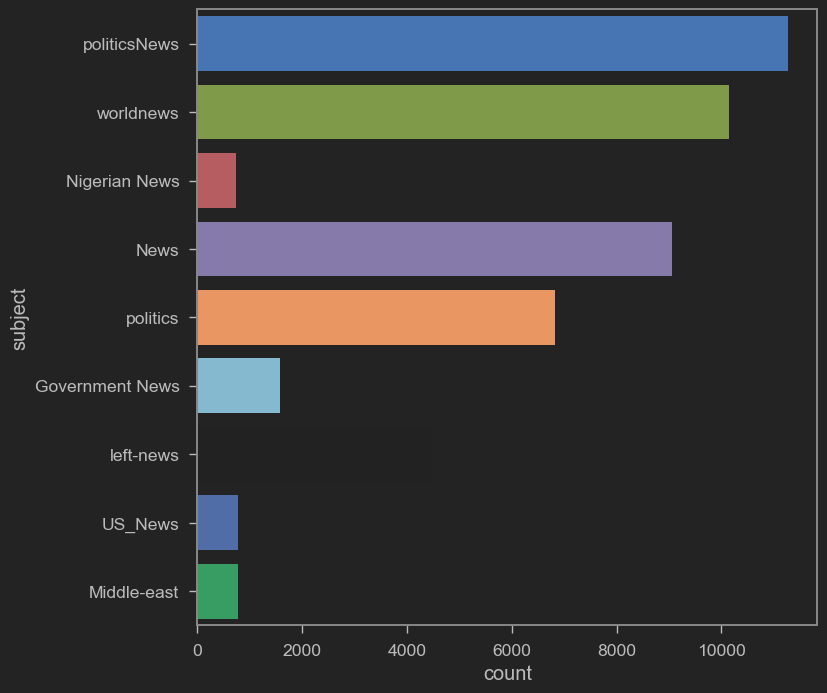

In [182]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

<AxesSubplot: xlabel='count', ylabel='isTrue'>

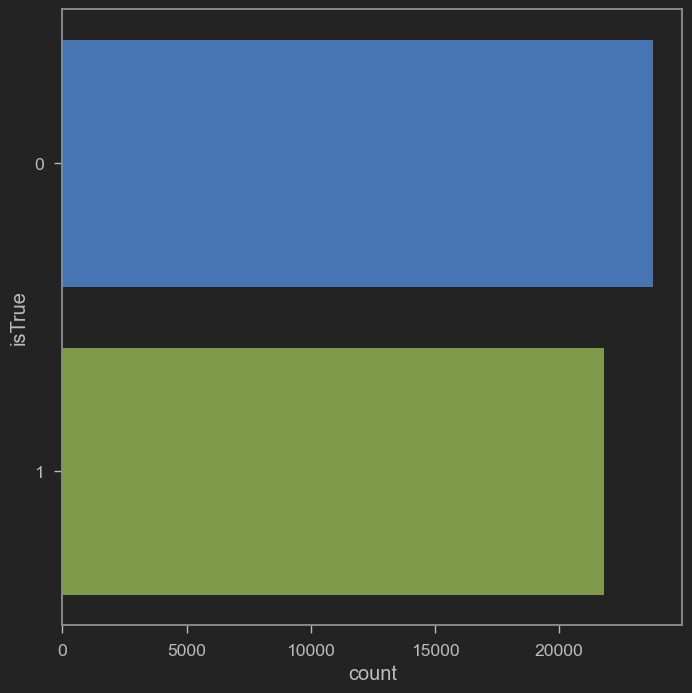

In [183]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "isTrue", data = df)

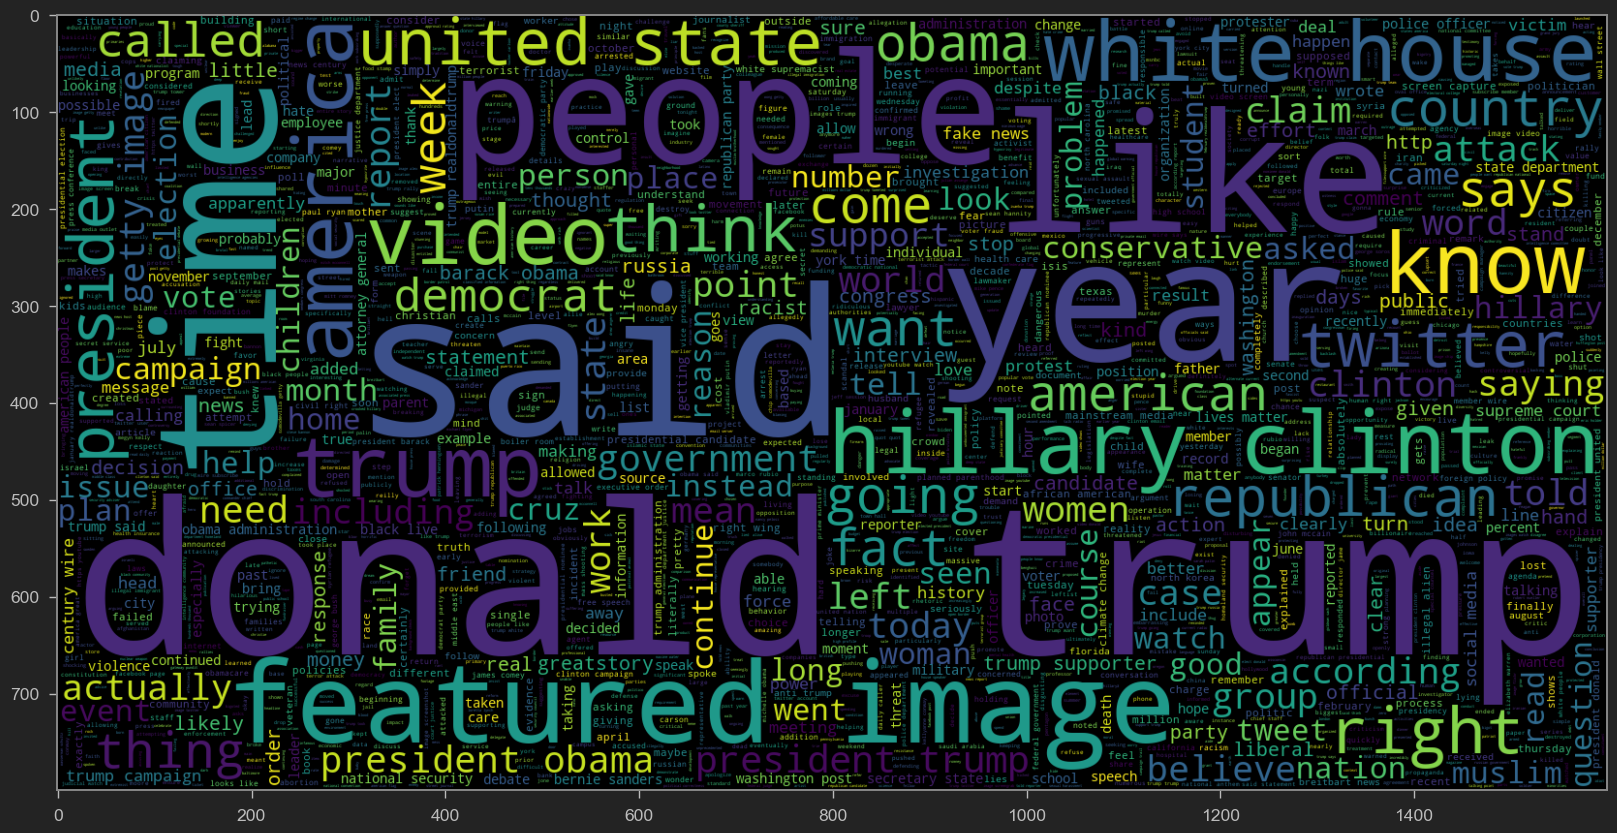

In [184]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isTrue == 0].clean_merged))
plt.imshow(wc, interpolation = 'bilinear')

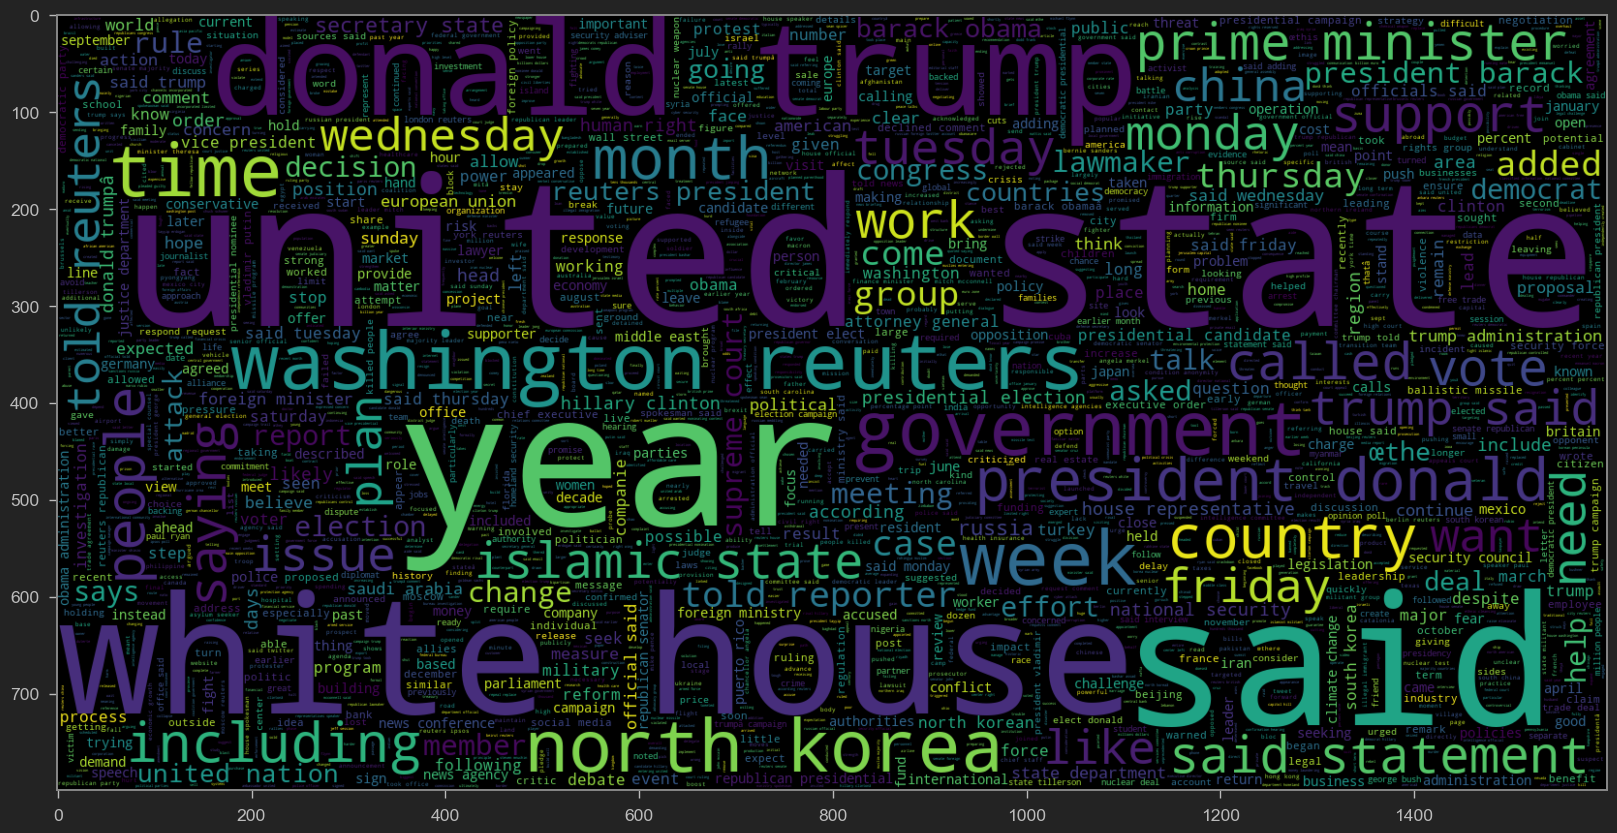

In [185]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isTrue == 1].clean_merged))
plt.imshow(wc, interpolation = 'bilinear')

In [19]:
maxlen = -1
for doc in df.clean_merged:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [4]:
avg = 0
maxlen = -1
for doc in df.clean_merged:
    tokens = nltk.word_tokenize(doc)
    
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
        avg = avg + len(tokens)
print("The maximum number of words in any document is =", maxlen)
print ("the number is =",avg)
print(avg/44898)
 

NameError: name 'df' is not defined

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_merged, df.isTrue, test_size = 0.25)

In [24]:
from nltk import word_tokenize
tokenizer = Tokenizer(num_words = unique_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [25]:
padded_train = pad_sequences(train_sequences,maxlen = 128, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 128, truncating = 'post')

In [20]:
for i,doc in enumerate(padded_test[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0    39   281   367 12466
   436  7062    39     7    71     3  1069   281    53    82   436    16
   275   557   733   389   479  1283  6134  1527    16   275   168   281
    17   146  1411  1594  1418  1072 12466     2]
The padded encoding for document 2  is :  [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0   

In [26]:
y_train = np.asarray(y_train)

In [27]:
model = Sequential()

In [28]:
model.add(Embedding(unique_words, output_dim = 128))

In [29]:
# model.add(Bidirectional(LSTM(128)))
# model.add(Dropout(0.5))
# # Dense layers
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(1,activation= 'sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# model.summary()


model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         16104704  
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,154,177
Trainable params: 16,154,177
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)

Epoch 1/5
503/503 [==============================] - 133s 258ms/step - loss: 0.2943 - accuracy: 0.9035 - val_loss: 0.3436 - val_accuracy: 0.8904
Epoch 2/5
503/503 [==============================] - 132s 263ms/step - loss: 0.3252 - accuracy: 0.8963 - val_loss: 0.3580 - val_accuracy: 0.8607
Epoch 3/5
503/503 [==============================] - 137s 272ms/step - loss: 0.2517 - accuracy: 0.9064 - val_loss: 0.1842 - val_accuracy: 0.9399
Epoch 4/5
503/503 [==============================] - 135s 269ms/step - loss: 0.3047 - accuracy: 0.8966 - val_loss: 0.2074 - val_accuracy: 0.9326
Epoch 5/5
503/503 [==============================] - 139s 276ms/step - loss: 0.1314 - accuracy: 0.9589 - val_loss: 0.1252 - val_accuracy: 0.9614


In [31]:
pred = model.predict(padded_test)

373/373 [==============================] - 11s 27ms/step


In [32]:
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9619095561708197


In [34]:
from sklearn.metrics import f1_score

fscore = f1_score(list(y_test), prediction)

print("f1_score : ", fscore)

f1_score :  0.9624855395802346


In [35]:
from sklearn.metrics import roc_curve
rocacurve = roc_curve(list(y_test), prediction)
print("roc-curve: ", rocacurve)
plt.figure(figsize = (25,25))


roc-curve:  (array([0.        , 0.04825375, 1.        ]), array([0.        , 0.97196262, 1.        ]), array([2, 1, 0]))


<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

In [36]:
 from sklearn.metrics import precision_score
precision = precision_score(list(y_test), prediction)

 print("precision : ", precision) 

precision :  0.9531914893617022


In [37]:
from sklearn.metrics import recall_score
recall = recall_score(list(y_test), prediction)
print ("recall : ", recall)

recall :  0.9719626168224299


<AxesSubplot: >

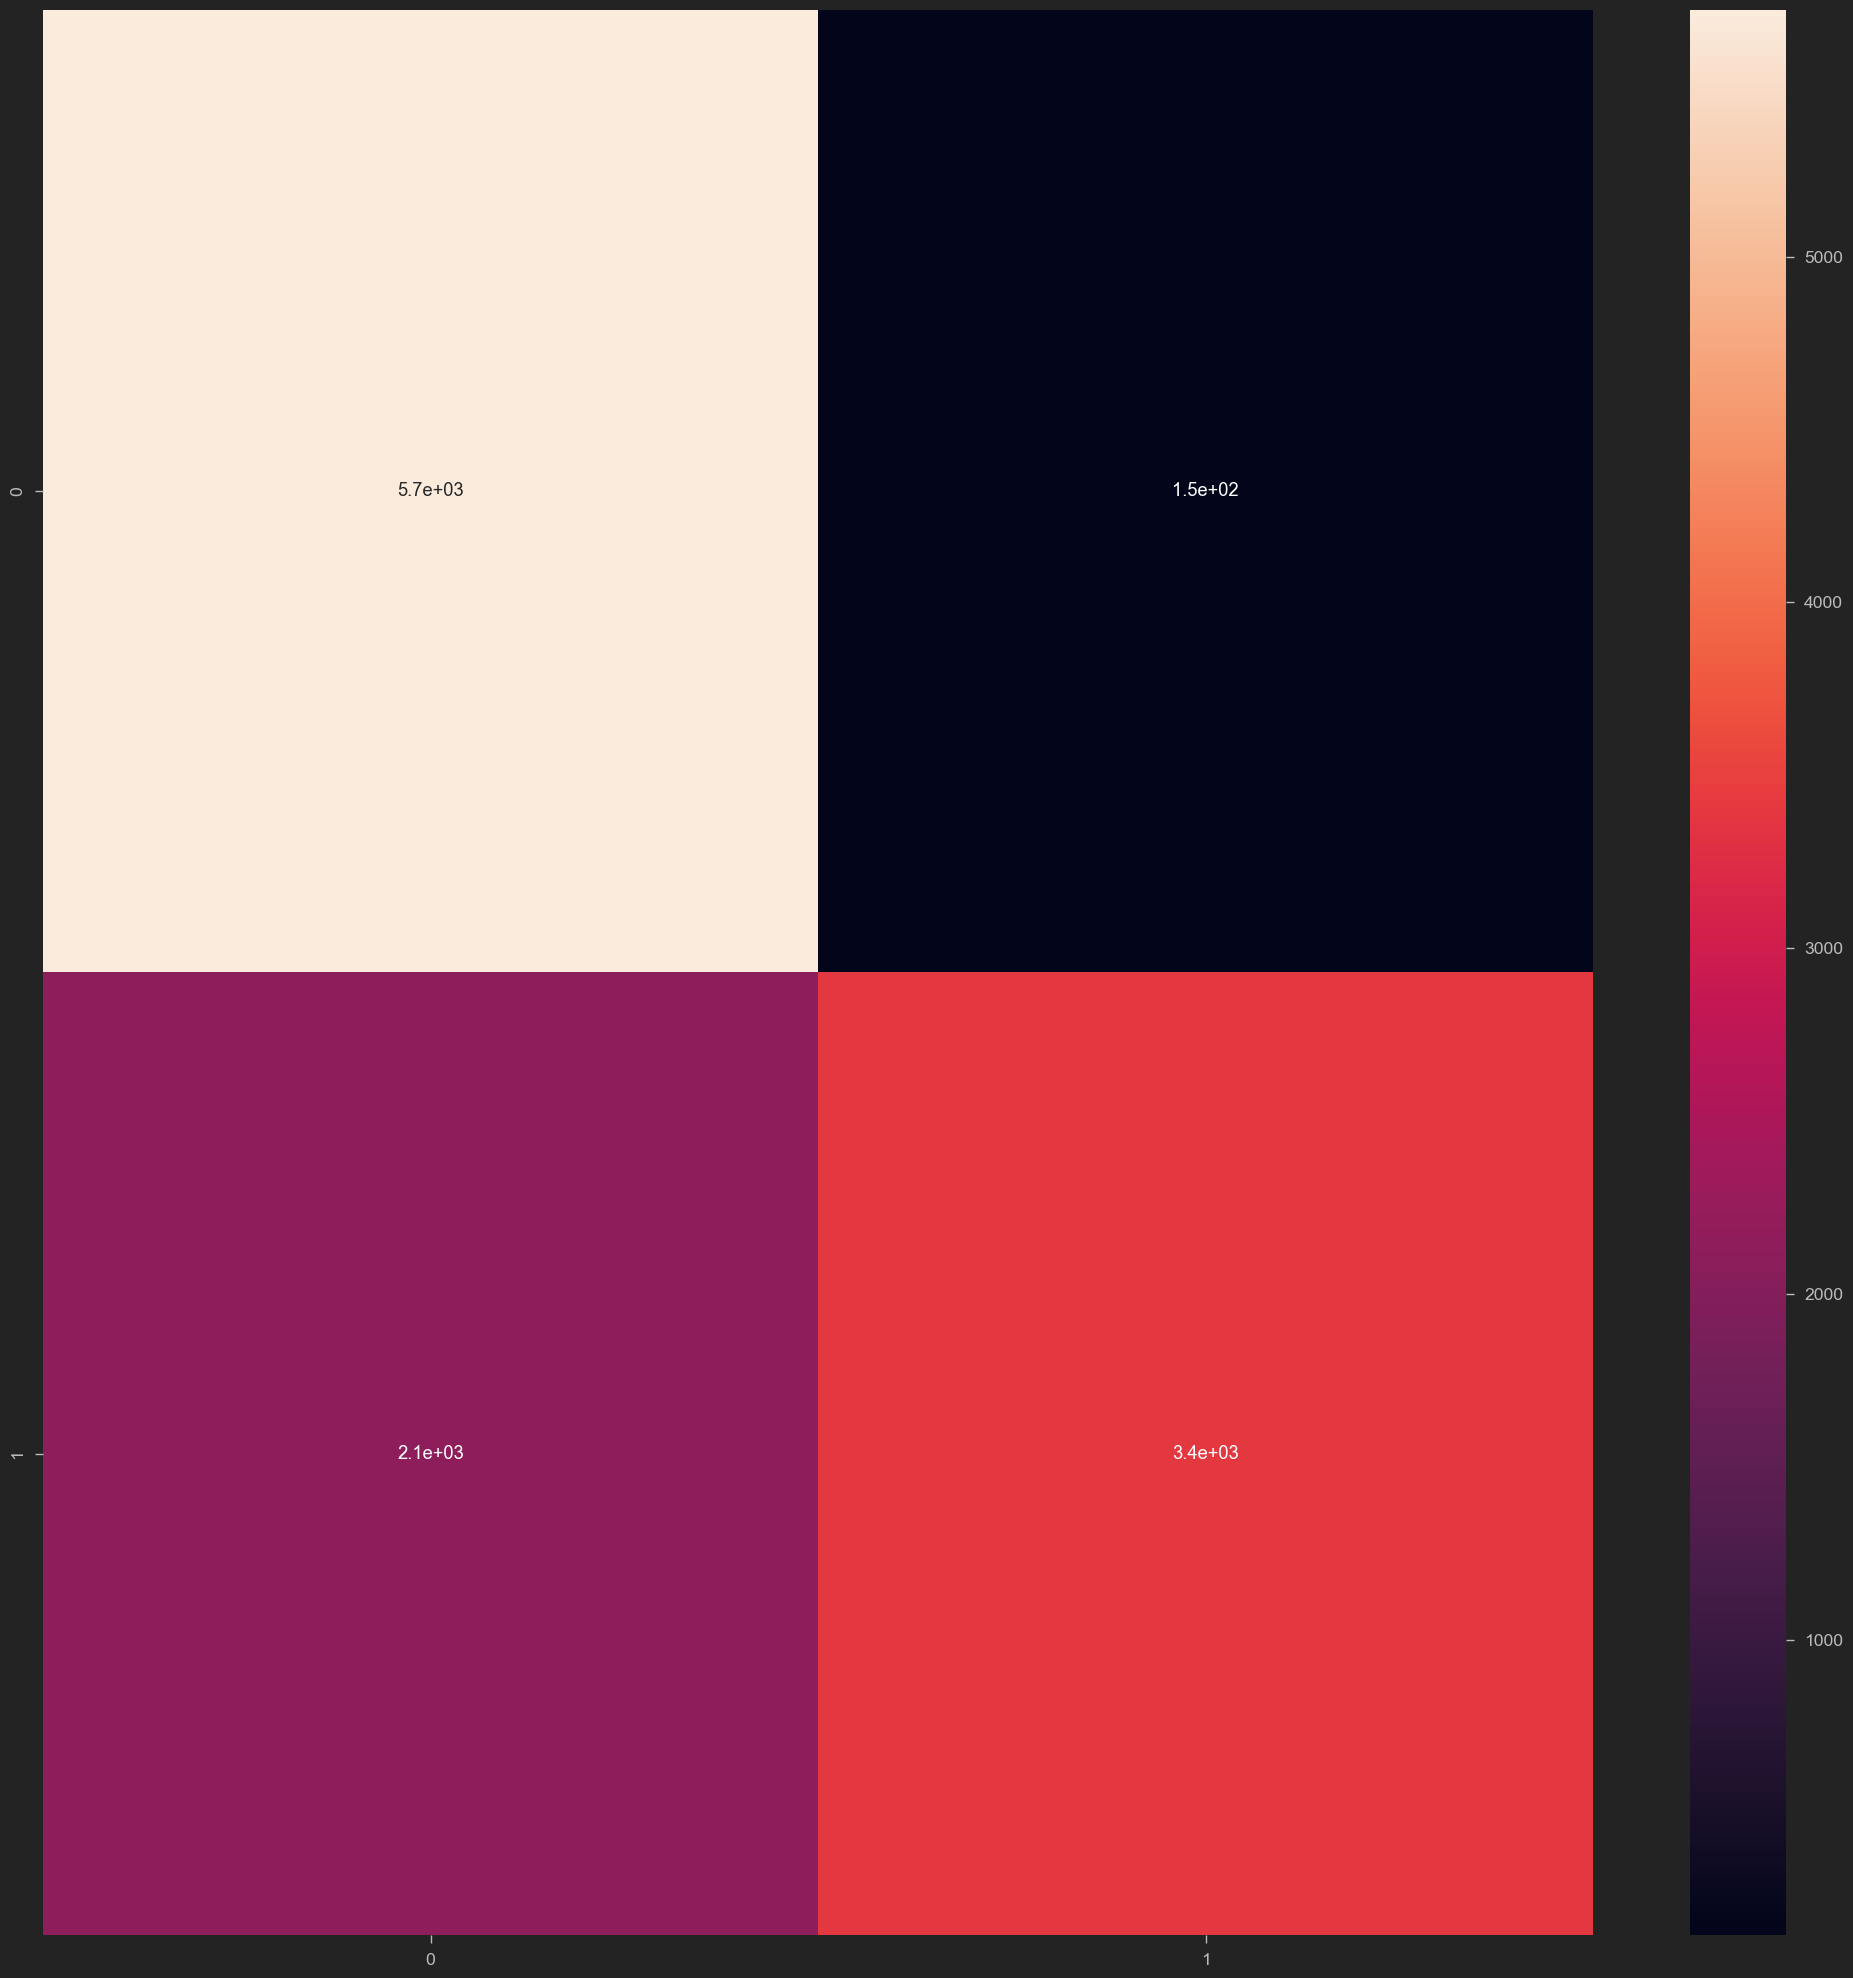

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
category = { 0: 'Fake News', 1 : "Real News"}

In [ ]:
model.save("kusksu")

In [ ]:
!ls

In [1]:
import pickle

In [ ]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

In [ ]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

model.save("kukksu.h5")

In [203]:
model.save("kusmu.h5")

In [36]:
model.save_weights("tosser.h5")

In [123]:
input_text = ['You freaking suck! I am going to hit you.']

res = model.predict(input_text)

ValueError: in user code:

    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Python310\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_15" "                 f"(type Sequential).
    
    Input 0 of layer "bidirectional_20" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)
    
    Call arguments received by layer "sequential_15" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=False
      • mask=None


In [100]:
input_text

['You freaking suck! I am going to hit you.']

In [101]:
res= model.predict(input_text)

ValueError: in user code:

    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Python310\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_8" "                 f"(type Sequential).
    
    Input 0 of layer "bidirectional_13" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)
    
    Call arguments received by layer "sequential_8" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=False
      • mask=None
